In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\train.csv")
df_test=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\test.csv")
df_train=df_train.sample(frac=1,random_state=3)
df_test=df_test.sample(frac=1,random_state=3)
df_train.sort_values(by='Id',inplace=True)
df_test.sort_values(by='Id',inplace=True)
# df_train.drop('Id',axis=1,inplace=True)
# df_test.drop('Id',axis=1,inplace=True)

In [3]:
print(df_train.shape)
df_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df_test.shape)
df_test

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
for i,j in zip(df_train.isnull().sum(),df_train.isnull().sum().index):
    if(i>0):
        print(i,j)

259 LotFrontage
1369 Alley
8 MasVnrType
8 MasVnrArea
37 BsmtQual
37 BsmtCond
38 BsmtExposure
37 BsmtFinType1
38 BsmtFinType2
1 Electrical
690 FireplaceQu
81 GarageType
81 GarageYrBlt
81 GarageFinish
81 GarageQual
81 GarageCond
1453 PoolQC
1179 Fence
1406 MiscFeature


In [6]:
for i,j in zip(df_test.isnull().sum(),df_test.isnull().sum().index):
    if(i>0):
        print(i,j)

4 MSZoning
227 LotFrontage
1352 Alley
2 Utilities
1 Exterior1st
1 Exterior2nd
16 MasVnrType
15 MasVnrArea
44 BsmtQual
45 BsmtCond
44 BsmtExposure
42 BsmtFinType1
1 BsmtFinSF1
42 BsmtFinType2
1 BsmtFinSF2
1 BsmtUnfSF
1 TotalBsmtSF
2 BsmtFullBath
2 BsmtHalfBath
1 KitchenQual
2 Functional
730 FireplaceQu
76 GarageType
78 GarageYrBlt
78 GarageFinish
1 GarageCars
1 GarageArea
78 GarageQual
78 GarageCond
1456 PoolQC
1169 Fence
1408 MiscFeature
1 SaleType


As per description NA means No Basement for 'PoolQC','Fence','MiscFeature','Alley'

In [7]:
df_train.loc[(df_train['PoolQC'].isnull()),'PoolQC']='None'
df_test.loc[(df_test['PoolQC'].isnull()),'PoolQC']='None'
df_train.loc[(df_train['Fence'].isnull()),'Fence']='None'
df_test.loc[(df_test['Fence'].isnull()),'Fence']='None'
df_train.loc[(df_train['MiscFeature'].isnull()),'MiscFeature']='None'
df_test.loc[(df_test['MiscFeature'].isnull()),'MiscFeature']='None'
df_train.loc[(df_train['Alley'].isnull()),'Alley']='No alley access'
df_test.loc[(df_test['Alley'].isnull()),'Alley']='No alley access'

There is  a linear relastionship between LotFrontage and LotArea

Hence filled missing values for LotFrontage considering LotArea

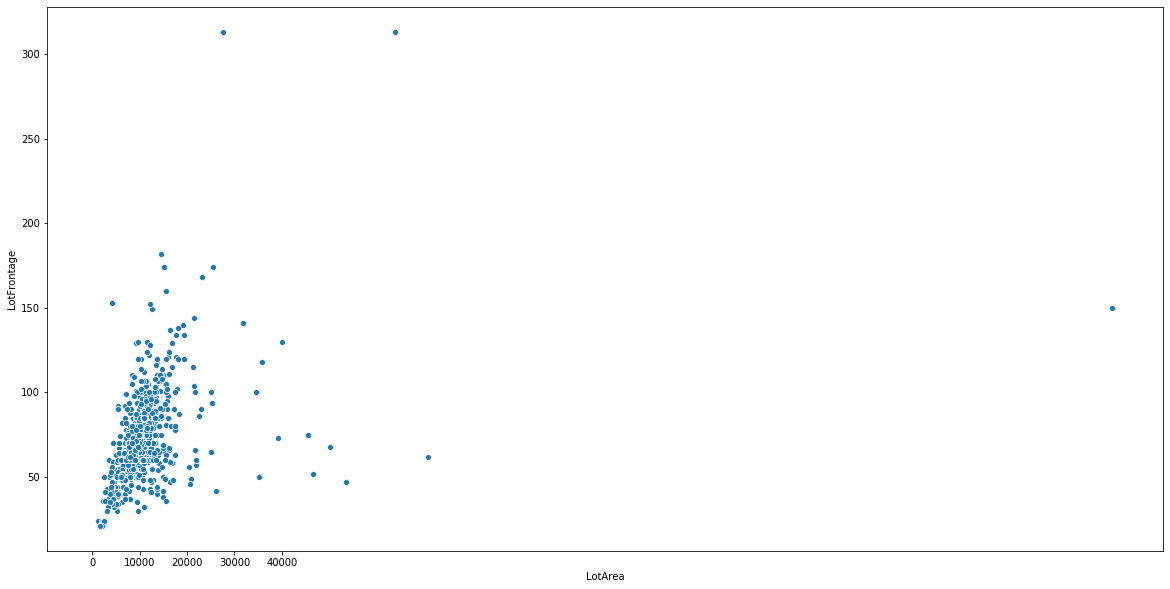

In [8]:
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,50000,10000))
sns.scatterplot(df_train['LotArea'],df_train['LotFrontage'])

In [9]:
df_train.describe()[['LotFrontage','LotArea']]

,LotFrontage,LotArea
count,1201.000000,1460.000000
mean,70.049958,10516.828082
std,24.284752,9981.264932
min,21.000000,1300.000000
25%,59.000000,7553.500000
50%,69.000000,9478.500000
75%,80.000000,11601.500000
max,313.000000,215245.000000


In [10]:
df_train.loc[(df_train['LotArea']>1300) & (df_train['LotArea']<7553) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>1300) & (df_train['LotArea']<7553) ]['LotFrontage'].mean()
df_train.loc[(df_train['LotArea']>7553) & (df_train['LotArea']<9478) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>7553) & (df_train['LotArea']<9478) ]['LotFrontage'].mean()
df_train.loc[(df_train['LotArea']>9478) & (df_train['LotArea']<11601) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>9478) & (df_train['LotArea']<11601) ]['LotFrontage'].mean()
df_train.loc[(df_train['LotArea']>11601) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>11601)]['LotFrontage'].mean()

In [11]:
df_test.describe()[['LotFrontage','LotArea']]

,LotFrontage,LotArea
count,1232.000000,1459.000000
mean,68.580357,9819.161069
std,22.376841,4955.517327
min,21.000000,1470.000000
25%,58.000000,7391.000000
50%,67.000000,9399.000000
75%,80.000000,11517.500000
max,200.000000,56600.000000


In [12]:
df_test.loc[(df_test['LotArea']>1470) & (df_test['LotArea']<7391) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>1470) & (df_test['LotArea']<7391) ]['LotFrontage'].mean()
df_test.loc[(df_test['LotArea']>7391) & (df_test['LotArea']<9399) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>7391) & (df_test['LotArea']<9399) ]['LotFrontage'].mean()
df_test.loc[(df_test['LotArea']>9399) & (df_test['LotArea']<11517) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>9399) & (df_test['LotArea']<11517) ]['LotFrontage'].mean()
df_test.loc[(df_test['LotArea']>11517) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>11517)]['LotFrontage'].mean()

MasVnrArea and MasVnrType are related to each other

Many of the missing values are none hence with 0

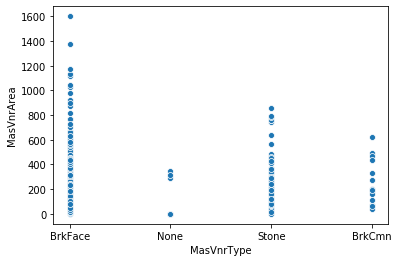

In [13]:
sns.scatterplot(df_train['MasVnrType'],df_train['MasVnrArea'])

In [14]:
df_train.loc[(df_train['MasVnrArea'].isnull()),'MasVnrArea']=df_train[(df_train['MasVnrType']=='None')]['MasVnrArea'].value_counts().index[0]
df_test.loc[(df_test['MasVnrArea'].isnull()),'MasVnrArea']=df_test[(df_test['MasVnrType']=='None')]['MasVnrArea'].value_counts().index[0]

As per description NA means No Basement for ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [15]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df_train.loc[(df_train[i].isnull()),i]='No Basement'
    df_test.loc[(df_test[i].isnull()),i]='No Basement'
    

As per description NA means No Fireplace for FireplaceQu

For ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'] NA means NO Garage

In [16]:
df_train.loc[(df_train['FireplaceQu'].isnull()),'FireplaceQu']='No Fireplace'
df_test.loc[(df_test['FireplaceQu'].isnull()),'FireplaceQu']='No Fireplace'

In [17]:
for i in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    df_train.loc[(df_train[i].isnull()),i]='No Garage'
    df_test.loc[(df_test[i].isnull()),i]='No Garage'

BsmtFinSF1 , BsmtFinSF2 , BsmtUnfSF , TotalBsmtSF , GarageArea   filling mean values

In [18]:
df_test.loc[(df_test['BsmtFinSF1'].isnull()),'BsmtFinSF1']=df_test['BsmtFinSF1'].mean()
df_test.loc[(df_test['BsmtFinSF2'].isnull()),'BsmtFinSF2']=df_test['BsmtFinSF2'].mean()
df_test.loc[(df_test['TotalBsmtSF'].isnull()),'TotalBsmtSF']=df_test['TotalBsmtSF'].mean()
df_test.loc[(df_test['BsmtUnfSF'].isnull()),'BsmtUnfSF']=df_test['BsmtUnfSF'].mean()
df_test.loc[(df_test['GarageArea'].isnull()),'GarageArea']=df_test['GarageArea'].mean()

FOllowing are categorical and are imputed by mode
Electrical,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,SaleType,MasVnrType


In [19]:
df_train.loc[(df_train['MasVnrType'].isnull()),'MasVnrType']=df_train['MasVnrType'].value_counts().index[0]
df_test.loc[(df_test['MasVnrType'].isnull()),'MasVnrType']=df_test['MasVnrType'].value_counts().index[0]

In [20]:
df_train.loc[(df_train['Electrical'].isnull()),'Electrical']=df_train['Electrical'].value_counts().index[0]
df_test.loc[(df_test['Electrical'].isnull()),'Electrical']=df_test['Electrical'].value_counts().index[0]

In [21]:
df_test.loc[(df_test['MSZoning'].isnull()),'MSZoning']=df_test['MSZoning'].value_counts().index[0]
df_test.loc[(df_test['Utilities'].isnull()),'Utilities']=df_test['Utilities'].value_counts().index[0]

In [22]:
df_test.loc[(df_test['Exterior1st'].isnull()),'Exterior1st']=df_test['Exterior1st'].value_counts().index[0]
df_test.loc[(df_test['Exterior2nd'].isnull()),'Exterior2nd']=df_test['Exterior2nd'].value_counts().index[0]

In [23]:
df_test.loc[(df_test['BsmtFullBath'].isnull()),'BsmtFullBath']=df_test['BsmtFullBath'].value_counts().index[0]
df_test.loc[(df_test['BsmtHalfBath'].isnull()),'BsmtHalfBath']=df_test['BsmtHalfBath'].value_counts().index[0]

In [24]:
df_test.loc[(df_test['KitchenQual'].isnull()),'KitchenQual']=df_test['KitchenQual'].value_counts().index[0]
df_test.loc[(df_test['Functional'].isnull()),'Functional']=df_test['Functional'].value_counts().index[0]
df_test.loc[(df_test['GarageCars'].isnull()),'GarageCars']=df_test['GarageCars'].value_counts().index[0]
df_test.loc[(df_test['SaleType'].isnull()),'SaleType']=df_test['SaleType'].value_counts().index[0]


In [25]:
df_train.to_csv('SalesPrice-Train.csv') 
df_test.to_csv('SalesPrice-Test.csv') 

In [254]:
df_train=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\SalesPrice-Train.csv")
df_train=df_train.sample(frac=1,random_state=3)
df_train.sort_values(by='Unnamed: 0',inplace=True)
df_train.drop('Unnamed: 0',axis=1,inplace=True)
df_test=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\SalesPrice-Test.csv")
df_test.sample(frac=1,random_state=3)
df_test.sort_values(by='Unnamed: 0',inplace=True)
df_test.drop('Unnamed: 0',axis=1,inplace=True)

In [255]:
# df_train=df_train.reset_index()
# df_test=df_test.reset_index()

In [256]:
# df_train.drop('index',axis=1,inplace=True)#(0-1459)
# df_test.drop('index',axis=1,inplace=True)

In [257]:
df_combine=pd.concat([df_train,df_test],axis=0)
df_combine

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,No alley access,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,No alley access,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,No alley access,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,No alley access,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [258]:
# columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
#          'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
#           'Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional'
#           'GarageType','GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']
df_dummies=pd.get_dummies(df_combine[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
          'Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional',
          'GarageType','GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']],drop_first=True)
df_combine=pd.concat([df_dummies,df_combine],axis=1)

In [259]:
df_combine.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
          'Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional',
          'GarageType','GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [260]:
df_combine

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,PoolArea,PoolQC,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,0,1,0,1,1,0,0,0,1,...,0,None,208500.0,0,8,856.0,0,2003,2003,2008
1,0,0,1,0,1,1,0,0,0,1,...,0,None,181500.0,0,6,1262.0,298,1976,1976,2007
2,0,0,1,0,1,1,0,0,0,0,...,0,None,223500.0,0,6,920.0,0,2001,2002,2008
3,0,0,1,0,1,1,0,0,0,0,...,0,None,140000.0,0,7,756.0,0,1915,1970,2006
4,0,0,1,0,1,1,0,0,0,0,...,0,None,250000.0,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,1,0,0,0,1,...,0,None,NaN,0,5,546.0,0,1970,1970,2006
1455,0,0,0,1,1,1,0,0,0,1,...,0,None,NaN,0,6,546.0,0,1970,1970,2006
1456,0,0,1,0,1,1,0,0,0,1,...,0,None,NaN,0,7,1224.0,474,1960,1996,2006
1457,0,0,1,0,1,1,0,0,0,1,...,0,None,NaN,0,6,912.0,80,1992,1992,2006


In [261]:
# One hot encoding
# 'OverallQual','OverallCond'
df_combine[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gd,TA,Gd,TA,Ex,Gd,No Fireplace,TA,TA,None
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,None
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,None
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,None
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,None
...,...,...,...,...,...,...,...,...,...,...
1454,TA,TA,TA,TA,Gd,TA,No Fireplace,No Garage,No Garage,None
1455,TA,TA,TA,TA,TA,TA,No Fireplace,TA,TA,None
1456,TA,TA,TA,TA,Ex,TA,TA,TA,TA,None
1457,TA,TA,Gd,TA,TA,TA,No Fireplace,No Garage,No Garage,None


In [262]:
from sklearn.preprocessing import LabelEncoder 
list2=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
le = LabelEncoder() 
for i in list2:
    df_combine[i]= le.fit_transform(df_combine[i]) 


In [263]:
df_combine.loc[(df_combine['GarageYrBlt']=='No Garage'),'GarageYrBlt']=0
df_combine.shape

(2919, 231)

In [264]:
df_combine

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,PoolArea,PoolQC,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,0,1,0,1,1,0,0,0,1,...,0,3,208500.0,0,8,856.0,0,2003,2003,2008
1,0,0,1,0,1,1,0,0,0,1,...,0,3,181500.0,0,6,1262.0,298,1976,1976,2007
2,0,0,1,0,1,1,0,0,0,0,...,0,3,223500.0,0,6,920.0,0,2001,2002,2008
3,0,0,1,0,1,1,0,0,0,0,...,0,3,140000.0,0,7,756.0,0,1915,1970,2006
4,0,0,1,0,1,1,0,0,0,0,...,0,3,250000.0,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,1,0,0,0,1,...,0,3,NaN,0,5,546.0,0,1970,1970,2006
1455,0,0,0,1,1,1,0,0,0,1,...,0,3,NaN,0,6,546.0,0,1970,1970,2006
1456,0,0,1,0,1,1,0,0,0,1,...,0,3,NaN,0,7,1224.0,474,1960,1996,2006
1457,0,0,1,0,1,1,0,0,0,1,...,0,3,NaN,0,6,912.0,80,1992,1992,2006


In [265]:
# splitting the data as it was previously into train and test
df_train=df_combine.iloc[0:1459,:]
df_test=df_combine.iloc[1460:,:]

In [266]:
df_test.drop('SalePrice',axis=1,inplace=True)

In [267]:
df_test

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,OverallQual,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,1,0,0,1,1,0,0,0,1,...,5,0,3,120,5,882.0,140,1961,1961,2010
1,0,0,1,0,1,1,0,0,0,0,...,6,0,3,0,6,1329.0,393,1958,1958,2010
2,0,0,1,0,1,1,0,0,0,0,...,5,0,3,0,6,928.0,212,1997,1998,2010
3,0,0,1,0,1,1,0,0,0,0,...,6,0,3,0,7,926.0,360,1998,1998,2010
4,0,0,1,0,1,1,0,0,0,0,...,8,0,3,144,5,1280.0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,1,0,0,0,1,...,4,0,3,0,5,546.0,0,1970,1970,2006
1455,0,0,0,1,1,1,0,0,0,1,...,4,0,3,0,6,546.0,0,1970,1970,2006
1456,0,0,1,0,1,1,0,0,0,1,...,5,0,3,0,7,1224.0,474,1960,1996,2006
1457,0,0,1,0,1,1,0,0,0,1,...,5,0,3,0,6,912.0,80,1992,1992,2006


In [268]:
X_tree=df_train.drop('SalePrice',axis=1)
y_tree=df_train['SalePrice']
X=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_test_scaled=scaler.transform(df_test)


In [269]:
y.skew()

1.8817600468196507

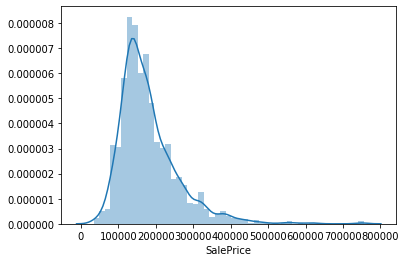

In [270]:
sns.distplot(y)
y=y.apply(np.log)


0.12069401445679007


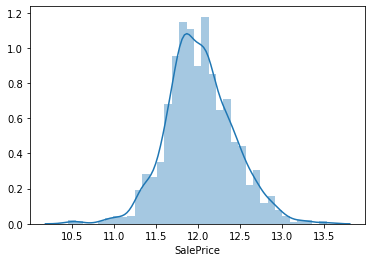

In [271]:
print(y.skew())
sns.distplot(y)


# RANDOMFOREST REGRESSION

In [272]:
import sklearn
from  sklearn.metrics import mean_squared_error

In [273]:
X=pd.DataFrame(X_scaled,columns=X.columns)
X_test=pd.DataFrame(X_test_scaled,columns=df_test.columns)

In [145]:
# Here we are telling the model to create 100 decision tress and make random forest and calculated the score etc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfr=RandomForestRegressor(random_state=3)
params={'n_estimators':sp_randint(50,300),
        'max_features':sp_randint(1,50),
        'max_depth':sp_randint(2,30),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20)
       }
rsearch_rfc=RandomizedSearchCV(rfr,param_distributions=params,cv=3,scoring='neg_mean_squared_error',random_state=3)
rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [146]:
rsearch_rfc.best_params_

{'max_depth': 12,
 'max_features': 25,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [147]:
rfr=RandomForestRegressor(**rsearch_rfc.best_params_)
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features=25, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [148]:
y_train_predict=rfr.predict(X)
mse = mean_squared_error(y,y_train_predict)
rmse=np.sqrt(mse)
rmse

0.10906668936028917

In [149]:
y_test_predict=rfr.predict(X_test)
y_test_predict

array([11.74968079, 11.92632168, 12.09009502, ..., 11.95861823,
       11.62100472, 12.33566908])

In [150]:
predictions=pd.DataFrame(y_test_predict)
y_test_predict=pd.Series(y_test_predict)
y_test_predict=y_test_predict.apply(np.exp)
# y=y.apply(np.log)
y_test_predict

0       126713.104028
1       151194.396733
2       178099.029522
3       189281.511143
4       192226.542118
            ...      
1454     87486.653175
1455     93291.245835
1456    156157.162619
1457    111413.603991
1458    227673.777287
Length: 1459, dtype: float64

# LASSO

In [181]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0007)
lasso.fit(X,y)
train_score=lasso.score(X,y)
coeff_used = np.sum(lasso.coef_!=0)
print("number of features used: ", coeff_used)
print(train_score)
prediction=lasso.predict(X)
mse = mean_squared_error(y,prediction)
rmse=np.sqrt(mse)
rmse

number of features used:  183
0.9380704561055694


0.09940297847249999

In [182]:
prediction

array([12.2466789 , 12.17865324, 12.27443087, ..., 12.26244815,
       12.51108035, 11.87700473])

In [183]:
# prediction=pd.DataFrame(prediction)
prediction=pd.Series(prediction)
prediction=prediction.apply(np.exp)
# y=y.apply(np.log)
prediction

0       208288.392057
1       194590.618795
2       214149.762186
3       170662.438645
4       292736.961818
            ...      
1454    195739.625818
1455    175220.286091
1456    211598.978536
1457    271327.090365
1458    143918.829035
Length: 1459, dtype: float64

Finding best alpha value

In [185]:
# alphas=np.arange(0,1,0.0005)
# for i in alphas:
#     lasso001 = Lasso(alpha=i)
#     lasso001.fit(X,y)
#     train_score001=lasso001.score(X,y)
#     coeff_used001 = np.sum(lasso001.coef_!=0)

#     print("training score for alpha ",i," ",train_score001)
#     print("number of features used:  ",i," ", coeff_used001)

Using PCA

In [186]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)


In [187]:
cov_matrix = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals

array([ 1.47673209e+01,  7.44445733e+00,  5.73847866e+00,  5.37297524e+00,
        4.77125341e+00,  4.18844797e+00,  3.97762516e+00,  3.59441518e+00,
        3.13047704e+00,  2.87738823e+00,  2.89307336e+00,  2.72615108e+00,
        2.65146390e+00,  2.61311548e+00,  2.51910538e+00,  2.40092869e+00,
        2.37571891e+00,  2.32207345e+00,  2.29181195e+00,  2.16454357e+00,
        2.15567611e+00,  2.10679896e+00,  2.07417494e+00,  2.02792276e+00,
        1.98778396e+00,  1.97326900e+00,  1.90567524e+00,  1.86436013e+00,
        1.85048691e+00,  1.83335722e+00,  1.77780708e+00,  1.75277768e+00,
        1.74088866e+00,  1.71098223e+00,  1.68188011e+00,  1.65595072e+00,
        1.63791550e+00,  1.62124542e+00,  1.61385488e+00,  1.58775578e+00,
        1.53965904e+00,  1.53261600e+00,  1.50947676e+00,  1.48917500e+00,
        1.46357484e+00,  1.44975483e+00,  1.43777960e+00,  1.39223623e+00,
        1.39347582e+00,  1.37792723e+00,  1.36813760e+00,  1.35495466e+00,
        1.33307402e+00,  

In [188]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
len(cum_var_exp)

Cumulative Variance Explained [  6.41617365   9.65067578  12.14395643  14.47843148  16.55146765
  18.37128382  20.09950073  21.6612188   23.02136289  24.27835874
  25.52853964  26.71301032  27.86503057  29.00038903  30.09490154
  31.1380681   32.1702814   33.17918657  34.17494359  35.11540446
  36.05201255  36.96738427  37.86858135  38.74968258  39.61334412
  40.47069912  41.29868569  42.10872146  42.91272955  43.70929504
  44.48172485  45.24327978  45.9996691   46.74306454  47.47381556
  48.19330066  48.90494973  49.60935592  50.31055102  51.00040647
  51.66936463  52.33526269  52.99110711  53.63813072  54.27403146
  54.90392762  55.52862073  56.13406452  56.73896973  57.33765791
  57.93209264  58.52079958  59.09999972  59.66950743  60.23412893
  60.79653089  61.35293345  61.89801273  62.44293832  62.97999701
  63.51207054  64.03829556  64.56375918  65.08438812  65.59423652
  66.10058755  66.60196922  67.10038712  67.59313139  68.08028319
  68.56375897  69.04267826  69.51807786  69.99

230

In [189]:
pca = PCA(n_components=229)
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X_train_pca)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     88.71
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:01:08   Log-Likelihood:                 1347.2
No. Observations:                1459   AIC:                            -2240.
Df Residuals:                    1232   BIC:                            -1041.
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0241      0.003   4391.370      0.000      12.019      12.030
x1             0.0895      0.001    125.632      0.000       0.088       0.091
x2             0.0127      0.001     12.667      0.000       0.011       0.015
x3             0.0347      0.001     30.351      0.000       0.032       0.037
x4            -0.0247      0.001    -20.896      0.000      -0.027      -0.022
x5            -0.0113      0.001     -9.014      0.000      -0.014      -0.009
x6            -0.0020      0.001     -1.478      0.140      -0.005       0.001
x7             0.0114      0.001      8.281      0.000       0.009       0.014
x8             0.0009      0.001      0.592      0.554      -0.002       0.004
x9            -0.0169      0.002    -10.942      0.000      -0.020      -0.014
x10           -0.0012      0.002     -0.744      0.457      -0.004       0.002
x11            0.0111      0.002      6.865      0.000       0.008       0.014
x12            0.0050      0.002      3.028      0.003       0.002       0.008
x13           -0.0169      0.002    -10.027      0.000      -0.020      -0.014
x14           -0.0174      0.002    -10.275      0.000      -0.021      -0.014
x15           -0.0181      0.002    -10.494      0.000      -0.021      -0.015
x16            0.0040      0.002      2.262      0.024       0.001       0.007
x17            0.0039      0.002      2.188      0.029       0.000       0.007
x18           -0.0108      0.002     -6.030      0.000      -0.014      -0.007
x19           -0.0080      0.002     -4.446      0.000      -0.012      -0.004
x20            0.0040      0.002      2.161      0.031       0.000       0.008
x21           -0.0069      0.002     -3.683      0.000      -0.011      -0.003
x22            0.0055      0.002      2.924      0.004       0.002       0.009
x23           -0.0069      0.002     -3.646      0.000      -0.011      -0.003
x24            0.0029      0.002      1.482      0.139      -0.001       0.007
x25            0.0233      0.002     12.002      0.000       0.020       0.027
x26            0.0066      0.002      3.401      0.001       0.003       0.010
x27           -0.0062      0.002     -3.136      0.002      -0.010      -0.002
x28            0.0106      0.002      5.306      0.000       0.007       0.015
x29            0.0104      0.002      5.185      0.000       0.006       0.014
x30           -0.0115      0.002     -5.701      0.000      -0.016      -0.008
x31           -0.0041      0.002     -1.989      0.047      -0.008   -5.57e-05
x32            0.0191      0.002      9.237      0.000       0.015       0.023
x33            0.0059      0.002      2.824      0.005       0.002       0.010
x34            0.0202      0.002      9.660      0.000       0.016       0.024
x35            0.0067      0.002      3.171      0.002       0.003       0.011
x3

In [191]:
prediction_lin=lin_reg.predict()
prediction_lin

array([12.24740246, 12.19732413, 12.27093803, ..., 12.25688723,
       12.52163692, 11.8795107 ])

In [192]:
mse = mean_squared_error(y,prediction_lin)
rmse=np.sqrt(mse)
rmse

0.09610792610625765

In [193]:
pca = PCA(n_components=175)
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X_train_pca)
lin_reg_175 = sm.OLS(y,X_constant).fit()
lin_reg_175.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     77.27
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:02:09   Log-Likelihood:                 1052.9
No. Observations:                1459   AIC:                            -1754.
Df Residuals:                    1283   BIC:                            -823.6
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0241      0.003   3662.843      0.000      12.018      12.031
x1             0.0895      0.001    104.790      0.000       0.088       0.091
x2             0.0127      0.001     10.565      0.000       0.010       0.015
x3             0.0347      0.001     25.316      0.000       0.032       0.037
x4            -0.0247      0.001    -17.430      0.000      -0.027      -0.022
x5            -0.0113      0.002     -7.518      0.000      -0.014      -0.008
x6            -0.0020      0.002     -1.233      0.218      -0.005       0.001
x7             0.0114      0.002      6.907      0.000       0.008       0.015
x8             0.0009      0.002      0.494      0.621      -0.003       0.004
x9            -0.0169      0.002     -9.127      0.000      -0.021      -0.013
x10           -0.0012      0.002     -0.620      0.535      -0.005       0.003
x11            0.0111      0.002      5.726      0.000       0.007       0.015
x12            0.0050      0.002      2.525      0.012       0.001       0.009
x13           -0.0169      0.002     -8.364      0.000      -0.021      -0.013
x14           -0.0174      0.002     -8.570      0.000      -0.021      -0.013
x15           -0.0181      0.002     -8.753      0.000      -0.022      -0.014
x16            0.0040      0.002      1.886      0.059      -0.000       0.008
x17            0.0039      0.002      1.825      0.068      -0.000       0.008
x18           -0.0108      0.002     -5.030      0.000      -0.015      -0.007
x19           -0.0080      0.002     -3.709      0.000      -0.012      -0.004
x20            0.0040      0.002      1.802      0.072      -0.000       0.008
x21           -0.0069      0.002     -3.072      0.002      -0.011      -0.002
x22            0.0055      0.002      2.439      0.015       0.001       0.010
x23           -0.0069      0.002     -3.041      0.002      -0.011      -0.002
x24            0.0029      0.002      1.236      0.217      -0.002       0.007
x25            0.0233      0.002     10.011      0.000       0.019       0.028
x26            0.0066      0.002      2.837      0.005       0.002       0.011
x27           -0.0062      0.002     -2.615      0.009      -0.011      -0.002
x28            0.0106      0.002      4.426      0.000       0.006       0.015
x29            0.0104      0.002      4.325      0.000       0.006       0.015
x30           -0.0115      0.002     -4.756      0.000      -0.016      -0.007
x31           -0.0041      0.002     -1.659      0.097      -0.009       0.001
x32            0.0191      0.002      7.705      0.000       0.014       0.024
x33            0.0059      0.002      2.355      0.019       0.001       0.011
x34            0.0202      0.003      8.057      0.000       0.015       0.025
x35            0.0067      0.003      2.645      0.008       0.002       0.012
x3

In [194]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg_175.predict())
rmse=np.sqrt(mse)
rmse

0.1175841556375345

# OLS

In [195]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg_ols = sm.OLS(y,X_constant).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     88.71
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:02:18   Log-Likelihood:                 1347.2
No. Observations:                1459   AIC:                            -2240.
Df Residuals:                    1232   BIC:                            -1041.
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0241      0.003   4391.370      0.000      12.019      12.030
MSZoning_FV                  0.0891      0.011      7.884      0.000       0.067       0.111
MSZoning_RH                  0.0441      0.006      7.762      0.000       0.033       0.055
MSZoning_RL                  0.1710      0.019      8.999      0.000       0.134       0.208
MSZoning_RM                  0.1369      0.016      8.800      0.000       0.106       0.167
Street_Pave                  0.0056      0.003      1.663      0.097      -0.001       0.012
Alley_No alley access       -0.0026      0.005     -0.552      0.581      -0.012       0.007
Alley_Pave                   0.0028      0.005      0.607      0.544      -0.006       0.012
LotShape_IR2                 0.0055      0.003      1.736      0.083      -0.001       0.012
LotShape_IR3                 0.0015      0.003      0.440      0.660      -0.005       0.008
LotShape_Reg                 0.0036      0.004      1.004      0.315      -0.003       0.011
LandContour_HLS              0.0063      0.004      1.475      0.141      -0.002       0.015
LandContour_Low             -0.0023      0.004     -0.518      0.604      -0.011       0.006
LandContour_Lvl              0.0093      0.005      1.823      0.069      -0.001       0.019
Utilities_NoSeWa            -0.0065      0.003     -2.038      0.042      -0.013      -0.000
LotConfig_CulDSac            0.0083      0.004      2.243      0.025       0.001       0.016
LotConfig_FR2               -0.0051      0.003     -1.579      0.115      -0.012       0.001
LotConfig_FR3               -0.0046      0.003     -1.519      0.129      -0.011       0.001
LotConfig_Inside            -0.0044      0.004     -1.188      0.235      -0.012       0.003
LandSlope_Mod                0.0059      0.004      1.566      0.118      -0.001       0.013
LandSlope_Sev               -0.0142      0.005     -3.088      0.002      -0.023      -0.005
Neighborhood_Blueste        -0.0014      0.003     -0.416      0.678      -0.008       0.005
Neighborhood_BrDale         -0.0057      0.005     -1.088      0.277      -0.016       0.005
Neighborhood_BrkSide        -0.0005      0.008     -0.054      0.957      -0.017       0.016
Neighborhood_ClearCr         0.0011      0.006      0.189      0.850      -0.010       0.012
Neighborhood_CollgCr        -0.0084      0.010     -0.825      0.410      -0.028       0.012
Neighborhood_Crawfor         0.0179      0.007      2.481      0.013       0.004       0.032
Neighborhood_Edwards        -0.0213      0.009     -2.309      0.021      -0.039      -0.003
Neighborhood_Gilbert        -0.0044      0.008     -0.546      0.585      -0.020       0.011
Neighborhood_IDOTRR         -0.0071      0.008     -0.921      0.357      -0.022       0.008
Neighborhood_M

In [196]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg_ols.predict())
rmse=np.sqrt(mse)
rmse

0.09610792610625765

In [197]:
prediction_test=lin_reg_ols.predict()
prediction_test=pd.Series(prediction_test)
prediction_test=prediction_test.apply(np.exp)
prediction_test
final=pd.DataFrame(prediction_test)

In [198]:
final.to_csv('Submit 2.csv') 


# Using VIF and then removing the columns and selecting the relevant once

In [199]:
X1=X.copy()

In [208]:
X_constant = sm.add_constant(X1)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     88.71
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:28:18   Log-Likelihood:                 1347.2
No. Observations:                1459   AIC:                            -2240.
Df Residuals:                    1232   BIC:                            -1041.
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0241      0.003   4391.370      0.000      12.019      12.030
MSZoning_FV                  0.0891      0.011      7.884      0.000       0.067       0.111
MSZoning_RH                  0.0441      0.006      7.762      0.000       0.033       0.055
MSZoning_RL                  0.1710      0.019      8.999      0.000       0.134       0.208
MSZoning_RM                  0.1369      0.016      8.800      0.000       0.106       0.167
Street_Pave                  0.0056      0.003      1.663      0.097      -0.001       0.012
Alley_No alley access       -0.0026      0.005     -0.552      0.581      -0.012       0.007
Alley_Pave                   0.0028      0.005      0.607      0.544      -0.006       0.012
LotShape_IR2                 0.0055      0.003      1.736      0.083      -0.001       0.012
LotShape_IR3                 0.0015      0.003      0.440      0.660      -0.005       0.008
LotShape_Reg                 0.0036      0.004      1.004      0.315      -0.003       0.011
LandContour_HLS              0.0063      0.004      1.475      0.141      -0.002       0.015
LandContour_Low             -0.0023      0.004     -0.518      0.604      -0.011       0.006
LandContour_Lvl              0.0093      0.005      1.823      0.069      -0.001       0.019
Utilities_NoSeWa            -0.0065      0.003     -2.038      0.042      -0.013      -0.000
LotConfig_CulDSac            0.0083      0.004      2.243      0.025       0.001       0.016
LotConfig_FR2               -0.0051      0.003     -1.579      0.115      -0.012       0.001
LotConfig_FR3               -0.0046      0.003     -1.519      0.129      -0.011       0.001
LotConfig_Inside            -0.0044      0.004     -1.188      0.235      -0.012       0.003
LandSlope_Mod                0.0059      0.004      1.566      0.118      -0.001       0.013
LandSlope_Sev               -0.0142      0.005     -3.088      0.002      -0.023      -0.005
Neighborhood_Blueste        -0.0014      0.003     -0.416      0.678      -0.008       0.005
Neighborhood_BrDale         -0.0057      0.005     -1.088      0.277      -0.016       0.005
Neighborhood_BrkSide        -0.0005      0.008     -0.054      0.957      -0.017       0.016
Neighborhood_ClearCr         0.0011      0.006      0.189      0.850      -0.010       0.012
Neighborhood_CollgCr        -0.0084      0.010     -0.825      0.410      -0.028       0.012
Neighborhood_Crawfor         0.0179      0.007      2.481      0.013       0.004       0.032
Neighborhood_Edwards        -0.0213      0.009     -2.309      0.021      -0.039      -0.003
Neighborhood_Gilbert        -0.0044      0.008     -0.546      0.585      -0.020       0.011
Neighborhood_IDOTRR         -0.0071      0.008     -0.921      0.357      -0.022       0.008
Neighborhood_M

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X1.values, j) for j in range(1, X1.shape[1])]

[4.296175627626449,
 48.13549342391413,
 32.2965630323065,
 1.5343712167092085,
 2.8766505978923353,
 2.7473364888140357,
 1.3355241141772978,
 1.5000862691686514,
 1.6785392786483087,
 2.4212712960037366,
 2.6770025088419724,
 3.446243666958861,
 1.343193299186551,
 1.8459538384886214,
 1.4173444782024123,
 1.2181684786472051,
 1.8171960576340098,
 1.878704413193172,
 2.8011378123768296,
 1.4337685011466912,
 3.6247333281221072,
 9.511826313773668,
 4.478182909572713,
 13.694727899979174,
 6.911402879281204,
 11.356663203836566,
 8.459316857330203,
 7.900190739883324,
 4.075662203733632,
 6.003574146205177,
 22.44463705267347,
 3.39247245725304,
 8.567870593423637,
 5.481526889031812,
 7.855148735247745,
 18.523412331812427,
 4.4292118342900215,
 8.91091797928454,
 6.623039995503241,
 12.74027833437229,
 3.2717474371462885,
 4.718275066754308,
 2.3285965136760893,
 3.5708682700468817,
 5.580432929588331,
 1.5319692863434609,
 1.9511404113427464,
 1.583557995959393,
 2.33626555240253,


In [210]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(X_constant.values, j) for j in range(X_constant.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(X_constant.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [211]:
train_out = calculate_vif(X1)

Iteration no.
1
[1.0, 17.032585278014267, 4.296175627626445, 48.13549342391413, 32.29656303230639, 1.5343712167092078, 2.876650597892338, 2.7473364888140357, 1.3355241141772978, 1.5000862691686505, 1.6785392786483075, 2.4212712960037357, 2.6770025088419698, 3.4462436669588636, 1.3431932991865505, 1.845953838488621, 1.417344478202412, 1.2181684786472038, 1.8171960576340103, 1.8787044131931725, 2.8011378123768296, 1.4337685011466879, 3.6247333281221072, 9.511826313773678, 4.478182909572708, 13.694727899979174, 6.911402879281199, 11.356663203836566, 8.459316857330203, 7.900190739883331, 4.075662203733632, 6.003574146205182, 22.444637052673528, 3.392472457253036, 8.567870593423637, 5.481526889031815, 7.855148735247745, 18.523412331812466, 4.429211834290017, 8.91091797928453, 6.6230399955032455, 12.74027833437229, 3.2717474371462907, 4.718275066754311, 2.3285965136760893, 3.5708682700468843, 5.580432929588324, 1.5319692863434589, 1.9511404113427455, 1.5835579959593937, 2.336265552402531, 1.

Iteration no.
3
[17.032585278014235, 4.296175627626449, 48.13549342391413, 32.2965630323065, 1.534371216709209, 2.8766505978923362, 2.747336488814034, 1.3355241141772978, 1.500086269168651, 1.6785392786483084, 2.4212712960037357, 2.6770025088419716, 3.446243666958861, 1.3431932991865505, 1.8459538384886214, 1.4173444782024123, 1.2181684786472051, 1.8171960576340096, 1.878704413193173, 2.801137812376828, 1.4337685011466914, 3.624733328122113, 9.511826313773678, 4.478182909572708, 13.694727899979195, 6.911402879281204, 11.356663203836566, 8.459316857330194, 7.9001907398833175, 4.0756622037336285, 6.003574146205169, 22.444637052673528, 3.3924724572530387, 8.567870593423645, 5.481526889031815, 7.855148735247751, 18.523412331812466, 4.4292118342900215, 8.91091797928454, 6.623039995503236, 12.740278334372272, 3.27174743714629, 4.718275066754305, 2.3285965136760893, 3.570868270046883, 5.580432929588331, 1.5319692863434609, 1.9511404113427464, 1.5835579959593935, 2.33626555240253, 1.1847131202

Iteration no.
5
[17.032585278014267, 4.296175627626447, 48.13549342391413, 32.2965630323065, 1.534371216709209, 2.8766505978923362, 2.7473364888140357, 1.3355241141772975, 1.500086269168651, 1.6785392786483087, 2.4212712960037357, 2.6770025088419716, 3.446243666958861, 1.3431932991865512, 1.845953838488621, 1.4173444782024123, 1.2181684786472051, 1.8171960576340096, 1.878704413193173, 2.8011378123768296, 1.4337685011466905, 3.6247333281221072, 9.511826313773678, 4.478182909572711, 13.694727899979174, 6.911402879281209, 11.356663203836566, 8.459316857330203, 7.900190739883338, 4.075662203733632, 6.003574146205174, 22.444637052673528, 3.3924724572530387, 8.567870593423645, 5.481526889031812, 7.855148735247745, 18.523412331812466, 4.42921183429002, 8.91091797928454, 6.623039995503241, 12.74027833437229, 3.2717474371462933, 4.718275066754305, 2.3285965136760907, 3.5708682700468843, 5.580432929588331, 1.5319692863434604, 1.9511404113427464, 1.5835579959593937, 2.3362655524025295, 1.18471312

Iteration no.
7
[16.956371791752282, 4.280682215528479, 47.736664312542416, 32.020718785957094, 1.5258549209512267, 2.869887244835483, 2.746988901072862, 1.3354029013346298, 1.496901616193337, 1.6759350038593732, 2.418926918848156, 2.6757893162270574, 3.445369706946942, 1.3431589198535936, 1.8426102107522886, 1.4141539056194632, 1.2126972320564657, 1.8057604715704294, 1.8737721073840672, 2.7953273630193367, 1.4333714046425523, 3.618474107604611, 9.48503661774933, 4.476670880985789, 13.68535273591407, 6.893724663420952, 11.353871603444745, 8.438413154195356, 7.887678643630539, 4.0498175267184395, 6.000380303121554, 22.435030990762986, 3.389035554268683, 8.565436515228743, 5.477275556745821, 7.850220207599885, 18.49836919537884, 4.408081132061904, 8.907284289287931, 6.621407905606446, 12.73961161129038, 3.2711743720741526, 4.7131140520202495, 2.3285934961791104, 3.5390189441319917, 5.53628779546347, 1.530529005058081, 1.9472152847242856, 1.5812353817580171, 2.3187987166982538, 1.18462202

Iteration no.
9
[16.949203235956734, 4.259527037652506, 47.70670124121426, 32.002924894000664, 1.5257123279516212, 2.843063118244837, 2.736574141413118, 1.3353682631126405, 1.488797021801643, 1.6723385696451327, 2.4186460030707333, 2.674122148957574, 3.4450296495006274, 1.3401790461939915, 1.8335094939191001, 1.4108036781029942, 1.2122569120557511, 1.7969559983856083, 1.8725173921580598, 2.79014356312923, 1.4328942831172957, 3.6111839140271447, 9.466906837348969, 4.396146209543225, 13.679767331155073, 6.892520238596132, 11.341595901281089, 8.430557885177556, 7.879700191788084, 4.049662172313971, 5.996546791759494, 22.427003350508826, 3.3884619669613865, 8.563233746525405, 5.4751621785784295, 7.840362200713467, 18.496340757329097, 4.403292035323111, 8.906661979693302, 6.618687985831168, 12.732544210999961, 3.2707407356490523, 4.7068051088870035, 2.328223262699791, 3.5372228336511427, 5.5285743574640795, 1.5302468100738305, 1.9457135201443096, 1.5812040916472796, 2.312408308736076, 1.184

Iteration no.
11
[16.877477283241973, 4.2241930096845435, 47.52016026647233, 31.840400634376007, 1.4842360126989744, 2.8403779185560594, 2.734596383093522, 1.3351545337245565, 1.4880838779889851, 1.6542849482437119, 2.4134759018850658, 2.6651822226440953, 3.4388785541702624, 1.3395408873358463, 1.8322262745700122, 1.4105551445900544, 1.2118819363583981, 1.7956017297321512, 1.8645942433609037, 2.7806122110296623, 1.4324300762802908, 3.611096093968436, 9.463747017901689, 4.387280227189699, 13.679366564023255, 6.891503891367455, 11.336554816094893, 8.42316090130386, 7.8725734949002435, 4.048093504658021, 5.9847499288794035, 22.40508627498148, 3.3884154551242776, 8.557754759012951, 5.4680552731192655, 7.835908368901536, 18.48148176253897, 4.400918243976111, 8.90451989014327, 6.618418010394508, 12.727234140525585, 3.2703471865824842, 4.703947735489004, 2.328153447619687, 3.5336248348847508, 5.511933370717905, 1.5269381641981283, 1.9436163930456567, 1.5810961013622922, 2.311278656879889, 1.1

Iteration no.
13
[16.838408623616505, 4.222692863568471, 47.5128733242643, 31.825903047518274, 1.4835342475789526, 2.840315095569491, 2.733001772336914, 1.333627615853137, 1.4437941092693543, 1.6529049440577794, 2.3961830351896625, 2.632084453266089, 3.381584608489007, 1.3368708129483893, 1.8308554396864263, 1.3982656252631955, 1.2108524557161235, 1.7951607639148637, 1.8631868651468226, 2.703427638742278, 1.4301428129600815, 3.6110420659238, 9.455106125676334, 4.365465482871519, 13.671776112712516, 6.886810648952328, 11.32892830218286, 8.41780938358088, 7.866776312988164, 4.045180783672306, 5.981397907537554, 22.40469265208974, 3.3834414225778593, 8.551830834266072, 5.421928641365529, 7.7766640379875, 18.456316735074655, 4.399243552767279, 8.903597925646881, 6.614164332095728, 12.651087600965681, 3.262135017413871, 4.699487954177288, 2.326569132355676, 3.5298612187309857, 5.507837105213149, 1.522718033489914, 1.9393481586703698, 1.579838238305512, 2.3086791127721322, 1.1838846193129877

Iteration no.
15
[5.348761436602467, 1.296957144092358, 4.386273544318036, 1.4441350807207436, 2.832448921307325, 2.7209896657261847, 1.3326456559301756, 1.443546812646386, 1.6500284949116724, 2.370743698487582, 2.591003836936073, 3.356748551110605, 1.334230657609807, 1.8296222077165882, 1.397323768268014, 1.2085690976239767, 1.794094712808115, 1.8584690992269135, 2.695489690710317, 1.4220892334292456, 3.565920725136822, 9.339508355795411, 4.360277033995991, 13.632539502369752, 6.863141808367902, 11.300906103830084, 8.395612033406733, 7.023051783972898, 3.9941957069871425, 5.964840685856278, 22.355944074002974, 3.3833600838833333, 8.522108432068613, 5.409357181086522, 7.76643680624389, 17.97180952462762, 4.372415989765331, 8.873409398489216, 6.605873951526017, 12.628869079864442, 3.2614980162770664, 4.692639630654651, 2.3230158430361154, 3.485749128562452, 5.489339118944728, 1.521803955065784, 1.9382267047124027, 1.5777970687341953, 2.3032170303569277, 1.1834999677310827, 1.56874420340

Iteration no.
17
[5.3400266350671, 1.2842799649096428, 4.3672601062966745, 1.4439337397323955, 2.8283347377235484, 2.7183584324583747, 1.33201743936345, 1.4433887909763714, 1.6440279452631528, 2.3611763283567533, 2.5551628394050376, 3.351126516398326, 1.2772370799589041, 1.8248719522759895, 1.3957763758850823, 1.207929255323583, 1.787503265194472, 1.8528211358886475, 2.6920542655735122, 1.42173709145449, 3.5588755195396913, 9.223951741047943, 4.341983003040681, 13.622671090363308, 6.853594855784944, 11.28638754808708, 8.392827425282519, 6.999552838670544, 3.992259215863506, 5.960455754168867, 22.307250837926652, 3.3825800056195097, 8.51439471568487, 5.407459435990979, 7.763062463177378, 17.87352754858172, 4.366731575648861, 8.867165557807645, 6.602345340433054, 12.617691664588728, 3.2605927545424565, 4.691778653460371, 2.321113295855885, 3.4640645132010377, 5.465976148058485, 1.520356550989715, 1.934234690124704, 1.5762508855686668, 2.3007398020180663, 1.1831079621420224, 1.56633472434

Iteration no.
19
[5.339520098613932, 1.2842003725501645, 4.367068724524784, 1.439989394100655, 2.8245100167213866, 2.7171550337794512, 1.3285263669613452, 1.4409052488306582, 1.6342141976624573, 2.350597107845554, 2.5069338659665545, 3.334563982044724, 1.276779073688361, 1.824313257011841, 1.3950586028037781, 1.2074172189427168, 1.7832205899650457, 1.8145015519334482, 2.6877875402469833, 1.4200942422925227, 3.5529813928322613, 9.209154522920825, 4.335053955452247, 13.598685958947932, 6.8351481492339285, 11.266943342949567, 8.380043670999148, 6.989895898610044, 3.9685953433951866, 5.944535432486911, 22.270745775521103, 3.381160488570768, 8.508725736052225, 5.391870278138012, 7.756349037719239, 17.84835667299057, 4.357324931791319, 8.856436591253557, 6.599699182594553, 12.612431010845517, 3.254053517730167, 4.664894622693964, 2.3207098396322667, 3.4619666319895224, 5.464177964901259, 1.519964748748071, 1.9338666962505382, 1.5740140142652428, 2.2997372797676796, 1.183050012894701, 1.56534

Iteration no.
21
[5.339494618819732, 1.2834853955669787, 4.366332429174457, 1.4399615733568654, 2.8171188339471467, 2.7136984767287924, 1.324937798481098, 1.4400576099621925, 1.6341589807915187, 2.3447608895469987, 2.5001799238984237, 3.332300875596792, 1.2758533887519345, 1.8218298316717747, 1.3950452108648912, 1.2071771452946607, 1.7825667152837767, 1.8120994663692895, 2.68716419424228, 1.4200512176785742, 3.534960006645659, 9.205689161941784, 4.313806269711002, 13.587053247819433, 6.834578690543135, 11.262353884056841, 8.380016210971007, 6.985876959144429, 3.965553359992244, 5.9402683214520575, 22.263202760412845, 3.3746621023165426, 8.504507338846686, 5.376116783643421, 7.751670082540232, 17.841013016724894, 4.35646323007261, 8.853243565645352, 6.5951211023252485, 12.61200346844617, 3.2538303439677563, 4.664598834611442, 2.320242742118865, 3.4606481078572493, 5.46192650953896, 1.513036409124319, 1.9306825620812946, 1.5737039191407713, 2.299131669794944, 1.1830089785173308, 1.565229

Iteration no.
23
[5.339215077295285, 1.282655031881208, 4.1931142766103715, 1.439525208375742, 2.8131243008581084, 2.6955490411989156, 1.3240145668275782, 1.4391872064579017, 1.6244837045585303, 2.328128247243664, 2.4982349554798446, 3.3160137646055485, 1.265652015877109, 1.8200291828897839, 1.3914918347924383, 1.2059526842461301, 1.781401738552693, 1.8109577082310773, 2.6848043749446027, 1.2520948857324365, 2.0783339586153726, 2.529074587348381, 1.7959157441817606, 3.119447286270705, 1.8866804532253278, 2.044903800735084, 2.673747234996465, 2.540409545179906, 2.37504060997131, 1.647210805805472, 2.7842052207506676, 1.8597545962083268, 2.165140686908795, 2.9262278231439853, 4.972573644650684, 1.9143985103838346, 1.6284426949427877, 1.9551343297007688, 6.515761466427828, 1.7280291927504654, 1.7961963092165232, 1.3524988824458484, 3.4588175397564056, 5.4385570570070305, 1.5087017547772907, 1.927226906113371, 1.573165316059705, 2.2958718430092775, 1.1818943477888733, 1.5586554551361576, 5

Iteration no.
25
[5.339198506448748, 1.2819088530799227, 4.182304386991742, 1.4388715836435924, 2.80805317421618, 2.686134353668688, 1.320174917470628, 1.4390286683292608, 1.6238055995565523, 2.3205957844789666, 2.4834451385907172, 3.3091524702649897, 1.2645856880116328, 1.819614618331416, 1.3870137406624112, 1.205080789135038, 1.7760571302345993, 1.8010524916518458, 2.6646105227716403, 1.2509352205667736, 2.048945065097902, 2.525689670562858, 1.7955194827185506, 3.1171636476202225, 1.8761383810188799, 2.040578182411256, 2.6694370822947184, 2.5351167939267767, 2.371544302411354, 1.6461019439492426, 2.7765363710646556, 1.8581810407145138, 2.096348351568973, 2.9040388108100803, 4.971645132227526, 1.910000169190591, 1.6273640585929097, 1.949972781459691, 6.510980442236181, 1.725524008919473, 1.7952522682214922, 1.352049289270586, 3.458010498361801, 5.437056545429321, 1.5036762837119066, 1.9202242552434876, 1.5728328029417527, 2.2947433584207824, 1.1812698771010492, 1.5560156309332978, 5.9

Iteration no.
28
[5.335823556301976, 1.2784295664796423, 4.110796518792576, 1.4364206988271557, 2.7817402604710484, 2.6757708748402824, 1.3185630676823301, 1.4362999449766378, 1.6139075327121164, 2.3072462394505777, 2.4644567984435413, 3.2786481729446644, 1.2633494748785108, 1.8155530731821057, 1.3829700522868313, 1.2028535745038826, 1.7690486038291897, 1.7953833088611426, 2.6608115005511976, 1.2500483882783782, 2.0413759136244756, 2.405022971932199, 1.7828812489906616, 2.9538561143053785, 1.8189400827559756, 2.034150312883857, 2.5773833527856547, 2.4564029535790537, 2.3628399669327993, 1.6114981638867312, 2.7759035991742347, 1.8371182417729783, 2.068267036664939, 2.8588926221023048, 4.711617139583477, 1.8668818123971913, 1.6230104544642294, 1.891395583186215, 6.3890155076927195, 1.72054755924279, 1.7676052295043643, 1.3429620130007083, 3.3259721375937383, 5.150558601596162, 1.48516115733836, 1.88581582982556, 1.5509807663804414, 2.2260992555935046, 1.1767688718716791, 1.52333915851434

Iteration no.
31
[5.323175785578572, 1.2751009275685499, 4.031395748501666, 1.435929120293489, 2.772853513919835, 2.671636709742203, 1.316790273594071, 1.4343849645361542, 1.6131298378604497, 2.3052871633917125, 2.4634873307623053, 3.269594779420327, 1.261264269376913, 1.8135652743073518, 1.3797556511059983, 1.20275196778188, 1.766498752909177, 1.7888541707502021, 2.62635278813066, 1.2442777100577032, 2.0095335950778184, 2.4019380435495323, 1.7727923623778619, 2.935105317114071, 1.8064172083668208, 2.0215722464661208, 2.5446364624410087, 2.4287265309609833, 2.333004696646879, 1.6065205485163936, 2.7665377621983898, 1.8298243423940093, 2.0614229777417044, 2.8292729254345774, 4.688603412397247, 1.8635846280229333, 1.620747266235835, 1.8823536031652353, 6.370857559006486, 1.7172317549530345, 1.7601953574353564, 1.3416373018479992, 3.3161828494842704, 5.147145470021391, 1.4786896281199586, 1.874440379093128, 1.55090036381428, 2.2194775272471747, 1.176018146155115, 1.5205008762571415, 1.487

Iteration no.
34
[2.413301187060503, 1.274102418740973, 4.023778798432105, 1.4333823865195738, 2.7679244508006935, 2.6679409803952923, 1.3159496751559319, 1.3981511651201992, 1.6127861097529326, 2.287017292908583, 2.4601106788483524, 3.2670097381642225, 1.2580746460730454, 1.7960238605603656, 1.3783164492962754, 1.2025121562966126, 1.765096099251756, 1.785019491835825, 2.615682333753751, 1.2416830975651842, 2.0074529350359183, 2.350812414565599, 1.7486156991916209, 2.5468697274577097, 1.780349520863568, 1.9637810552194623, 2.357492793076555, 2.413342389383264, 2.326861521149601, 1.5503558837154883, 2.758548203937984, 1.773254720831353, 1.9359638284175213, 2.4111842201609663, 4.6225419026584165, 1.8416294306447907, 1.5961778623601308, 1.803047207486407, 1.6306710385055538, 1.6804765220778615, 1.3321610230913898, 3.2922648202028233, 5.131656299823336, 1.4780452953866259, 1.8728785226451004, 1.54826734849868, 2.184435247213655, 1.175356575913112, 1.4799123871039552, 1.4687597826332588, 1.

Iteration no.
37
[2.404782761904854, 1.2718360983610568, 4.014123504794193, 1.4314163025972195, 2.7602591998780603, 2.6671583580492007, 1.3115318796212703, 1.3850610305616509, 1.6114465116490375, 2.285096217379692, 2.4548504187949556, 3.265719659530996, 1.2563404662353281, 1.7948791809381777, 1.3778117385335436, 1.2003659164998581, 1.7609995612900176, 1.779888747811738, 2.613104692555202, 1.2000856845194205, 2.005385991223827, 2.245501543054301, 1.734180802448149, 2.5420509396346573, 1.7613237762486345, 1.9053108817828577, 2.351966201631714, 2.325624469916751, 2.325067403520285, 1.5254758595529496, 2.7576316017572338, 1.7715954306860469, 1.923412365410008, 2.4096300435126405, 4.556918671359656, 1.7872664070394428, 1.5918726285787048, 1.7957129067348807, 1.628189577615361, 1.6776600004501165, 1.3282545007769346, 3.2241662904918305, 4.976234191819184, 1.4685419109695028, 1.8589940962331135, 1.5217601784046046, 2.1571134324583303, 1.1737891449344175, 1.4658348297384336, 1.4530276373173243

In [212]:
train_out.columns



Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'Street_Pave',
       'Alley_No alley access', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS',
       ...
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearRemodAdd', 'YrSold'],
      dtype='object', length=193)

In [213]:
X_selected=train_out

In [215]:
X_selected

,MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearRemodAdd,YrSold
0,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,0.760923,-0.188378,...,-1.598653,0.216657,-0.516787,0.650852,-0.068715,-0.270308,0.911711,-0.755229,0.877986,0.138826
1,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,0.760923,-0.188378,...,-0.489027,-0.704046,2.179252,-0.072372,-0.068715,-0.270308,-0.318804,1.643994,-0.430226,-0.614137
2,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,-1.314193,-0.188378,...,0.990475,-0.070119,-0.516787,0.650852,-0.068715,-0.270308,-0.318804,-0.755229,0.829534,0.138826
3,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,-1.314193,-0.188378,...,-1.598653,-0.175774,-0.516787,0.650852,-0.068715,-0.270308,0.296454,-0.755229,-0.720940,-1.367100
4,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,-1.314193,-0.188378,...,2.100101,0.563808,-0.516787,1.374077,-0.068715,-0.270308,1.526968,0.790579,0.732629,0.138826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.630999,-0.1053,-0.419124,0.06426,-3.877237,5.880932,-0.170041,-0.083074,0.760923,-0.188378,...,1.360351,1.001520,-0.516787,0.650852,-0.068715,-0.270308,-0.318804,-0.755229,0.974891,0.891789
1455,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,0.760923,-0.188378,...,0.620600,-0.100306,-0.516787,-0.072372,-0.068715,-0.270308,0.296454,-0.755229,0.732629,-0.614137
1456,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,0.760923,-0.188378,...,-1.598653,-0.704046,0.381893,-0.072372,-0.068715,-0.270308,0.296454,2.054600,0.151202,1.644752
1457,-0.215936,-0.1053,-0.419124,0.06426,0.257916,-0.170041,-0.170041,-0.083074,0.760923,-0.188378,...,-0.489027,0.201564,3.077931,0.650852,-0.068715,-0.270308,1.526968,-0.755229,1.023343,1.644752


In [216]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X_selected)
lin_reg1 = sm.OLS(y,X_constant).fit()
lin_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     68.87
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:40:02   Log-Likelihood:                 1050.9
No. Observations:                1459   AIC:                            -1714.
Df Residuals:                    1265   BIC:                            -688.4
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0241      0.003   3632.048      0.000      12.018      12.031
MSZoning_FV                  0.0126      0.005      2.453      0.014       0.003       0.023
MSZoning_RH                  0.0014      0.004      0.364      0.716      -0.006       0.009
MSZoning_RM                  0.0118      0.007      1.776      0.076      -0.001       0.025
Street_Pave                  0.0114      0.004      2.867      0.004       0.004       0.019
Alley_No alley access       -0.0035      0.005     -0.628      0.530      -0.014       0.007
Alley_Pave                   0.0066      0.005      1.228      0.220      -0.004       0.017
LotShape_IR2                 0.0049      0.004      1.290      0.197      -0.003       0.012
LotShape_IR3                -0.0088      0.004     -2.257      0.024      -0.016      -0.001
LotShape_Reg                 0.0009      0.004      0.207      0.836      -0.007       0.009
LandContour_HLS              0.0044      0.005      0.878      0.380      -0.005       0.014
LandContour_Low             -0.0027      0.005     -0.514      0.608      -0.013       0.008
LandContour_Lvl              0.0136      0.006      2.270      0.023       0.002       0.025
Utilities_NoSeWa            -0.0070      0.004     -1.885      0.060      -0.014       0.000
LotConfig_CulDSac            0.0107      0.004      2.423      0.016       0.002       0.019
LotConfig_FR2               -0.0092      0.004     -2.357      0.019      -0.017      -0.002
LotConfig_FR3               -0.0073      0.004     -2.008      0.045      -0.014      -0.000
LotConfig_Inside            -0.0080      0.004     -1.810      0.070      -0.017       0.001
LandSlope_Mod                0.0093      0.004      2.098      0.036       0.001       0.018
LandSlope_Sev               -0.0109      0.005     -2.051      0.040      -0.021      -0.000
Neighborhood_Blueste        -0.0042      0.004     -1.170      0.242      -0.011       0.003
Neighborhood_BrDale         -0.0110      0.005     -2.346      0.019      -0.020      -0.002
Neighborhood_BrkSide        -0.0042      0.005     -0.850      0.396      -0.014       0.006
Neighborhood_ClearCr         0.0070      0.004      1.605      0.109      -0.002       0.016
Neighborhood_CollgCr         0.0020      0.005      0.371      0.711      -0.008       0.012
Neighborhood_Crawfor         0.0253      0.004      5.763      0.000       0.017       0.034
Neighborhood_Edwards        -0.0173      0.005     -3.795      0.000      -0.026      -0.008
Neighborhood_Gilbert         0.0004      0.005      0.079      0.937      -0.010       0.010
Neighborhood_IDOTRR         -0.0286      0.005     -5.660      0.000      -0.038      -0.019
Neighborhood_MeadowV        -0.0233      0.005     -4.608      0.000      -0.033      -0.013
Neighborhood_M

In [217]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg1.predict())
rmse=np.sqrt(mse)
rmse

0.11774636283241095

In [219]:
cols = list(X_selected.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['MSZoning_FV', 'Street_Pave', 'Alley_Pave', 'LotShape_IR3', 'LotConfig_CulDSac', 'LandSlope_Sev', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'BsmtExposure_Gd', 'BsmtExposure_No Basement', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'Heating_GasW', 'Heating_Grav', 'CentralAir_Y', 'Functional_Maj2', 'Functional_Sev', 'GarageType_Detchd', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF', 'Ext

In [223]:
Final_selected=X[selected_features_BE]

In [224]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(Final_selected)
lin_reg3 = sm.OLS(y,X_constant).fit()
lin_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                 978.91
No. Observations:                1459   AIC:                            -1822.
Df Residuals:                    1391   BIC:                            -1462.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0241      0.003   3625.289      0.000      12.018      12.031
MSZoning_FV                  0.0109      0.004      2.652      0.008       0.003       0.019
Street_Pave                  0.0087      0.004      2.446      0.015       0.002       0.016
Alley_Pave                   0.0082      0.004      2.123      0.034       0.001       0.016
LotShape_IR3                -0.0106      0.004     -2.975      0.003      -0.018      -0.004
LotConfig_CulDSac            0.0143      0.003      4.089      0.000       0.007       0.021
LandSlope_Sev               -0.0128      0.004     -2.855      0.004      -0.022      -0.004
Neighborhood_ClearCr         0.0075      0.004      1.990      0.047       0.000       0.015
Neighborhood_Crawfor         0.0249      0.004      6.740      0.000       0.018       0.032
Neighborhood_Edwards        -0.0142      0.004     -3.836      0.000      -0.021      -0.007
Neighborhood_IDOTRR         -0.0221      0.004     -5.872      0.000      -0.030      -0.015
Neighborhood_MeadowV        -0.0154      0.004     -4.140      0.000      -0.023      -0.008
Neighborhood_NoRidge         0.0255      0.004      6.972      0.000       0.018       0.033
Neighborhood_NridgHt         0.0263      0.004      6.430      0.000       0.018       0.034
Neighborhood_OldTown        -0.0205      0.004     -5.026      0.000      -0.029      -0.013
Neighborhood_StoneBr         0.0242      0.004      6.692      0.000       0.017       0.031
Condition1_Norm              0.0179      0.004      4.902      0.000       0.011       0.025
Condition1_PosN              0.0106      0.004      2.813      0.005       0.003       0.018
Condition2_PosN             -0.0219      0.004     -6.059      0.000      -0.029      -0.015
Condition2_RRAe             -0.0116      0.005     -2.331      0.020      -0.021      -0.002
BldgType_Twnhs              -0.0256      0.004     -6.748      0.000      -0.033      -0.018
BldgType_TwnhsE             -0.0203      0.004     -5.023      0.000      -0.028      -0.012
RoofStyle_Hip                0.0086      0.004      2.401      0.016       0.002       0.016
RoofStyle_Shed               0.0132      0.005      2.610      0.009       0.003       0.023
RoofMatl_WdShngl             0.0104      0.004      2.968      0.003       0.004       0.017
Exterior1st_BrkComm         -0.0097      0.003     -2.802      0.005      -0.017      -0.003
Exterior1st_BrkFace          0.0195      0.005      4.142      0.000       0.010       0.029
Exterior1st_Stone            0.0070      0.003      2.062      0.039       0.000       0.014
Exterior1st_Wd Sdng         -0.0077      0.004     -2.060      0.040      -0.015      -0.000
Exterior2nd_BrkFace         -0.0093      0.005     -2.020      0.044      -0.018      -0.000
Exterior2nd_Hd

In [225]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg3.predict())
rmse=np.sqrt(mse)
rmse

0.12370145984550837

In [228]:
# Here we are telling the model to create 100 decision tress and make random forest and calculated the score etc

xgboost1=xgboost.XGBRegressor()
params={'n_estimators':sp_randint(50,1000),
        'max_features':sp_randint(1,50),
        'max_depth':sp_randint(2,30),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20)
       }
randomboost1=RandomizedSearchCV(xgboost1,param_distributions=params,cv=3,scoring='neg_mean_squared_error',random_state=3)
randomboost1.fit(Final_selected,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027910ACEAC8>,
                                        'min_samples_s

In [229]:
randomboost1.best_params_

{'max_depth': 3,
 'max_features': 30,
 'min_samples_leaf': 11,
 'min_samples_split': 9,
 'n_estimators': 221}

In [230]:
randomboost1.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             max_features=30, min_child_weight=1, min_samples_leaf=11,
             min_samples_split=9, missing=nan, monotone_constraints=None,
             n_estimators=221, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [232]:
rfr1=xgboost.XGBRegressor(**randomboost1.best_params_)
rfr1.fit(Final_selected,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             max_features=30, min_child_weight=1, min_samples_leaf=11,
             min_samples_split=9, missing=nan, monotone_constraints=None,
             n_estimators=221, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [233]:
y_train_predict1=rfr1.predict(Final_selected)
mse = mean_squared_error(y,y_train_predict1)
rmse=np.sqrt(mse)
rmse

0.05759033454428687

In [204]:
y_train_predict

array([12.24719941, 12.04285701, 12.30193082, ..., 12.19728298,
       12.35088007, 11.78874618])

1) NO Auto correlation

a)Durbin Watson

b)ACF plot

a)As Durbin-Watson:2.009

Hence there is No auto correlation

In [ ]:
# b)ACF plot
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.10)
acf.show()

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
# pd.DataFrame({'vif': vif[1:]}, index=X1.columns).T
for i,j in zip(X_selected.columns,vif):
    print(i,j)

NameError: name 'X_selected' is not defined

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


In [ ]:
X2=X.copy()
X2.drop(selected_features_BE,axis=1,inplace=True)

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X2)
lin_reg2 = sm.OLS(y,X_constant).fit()
lin_reg2.summary()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg2.predict())
rmse=np.sqrt(mse)
rmse

In [ ]:
# from sklearn.linear_model import ElasticNetCV, ElasticNet
# from sklearn.metrics import r2_score

# cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1,100,150,200], eps=0.001, n_alphas=200, fit_intercept=True, 
#                         normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
#                         copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [ ]:
# cv_model.fit(X,y)

In [ ]:
# print('Optimal alpha: %.8f'%cv_model.alpha_)
# print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
# print('Number of iterations %d'%cv_model.n_iter_)

In [ ]:
# model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
# model.fit(X, y)

In [ ]:
# print(r2_score(y, model.predict(X))) # training data performance

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg.predict())
rmse=np.sqrt(mse)
rmse

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

In [ ]:
# from sklearn.ensemble import VotingRegressor
# # rfr=RandomForestRegressor(**rsearch_rfc.best_params_)
# clf=VotingRegressor(estimators=[('lin_reg',lin_reg),('rfr',rfr)])
# clf.fit(X,y)
# y_train_pred=clf.predict(X)


XGBOOST

In [275]:
import xgboost
# !pip install xgboost
X_tree

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,OverallQual,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,0,1,0,1,1,0,0,0,1,...,7,0,3,0,8,856.0,0,2003,2003,2008
1,0,0,1,0,1,1,0,0,0,1,...,6,0,3,0,6,1262.0,298,1976,1976,2007
2,0,0,1,0,1,1,0,0,0,0,...,7,0,3,0,6,920.0,0,2001,2002,2008
3,0,0,1,0,1,1,0,0,0,0,...,7,0,3,0,7,756.0,0,1915,1970,2006
4,0,0,1,0,1,1,0,0,0,0,...,8,0,3,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0,0,0,1,0,1,0,0,1,...,7,0,3,0,6,1221.0,0,2004,2005,2009
1455,0,0,1,0,1,1,0,0,0,1,...,6,0,3,0,7,953.0,0,1999,2000,2007
1456,0,0,1,0,1,1,0,0,0,1,...,6,0,3,0,7,1542.0,349,1978,1988,2010
1457,0,0,1,0,1,1,0,0,0,1,...,7,0,3,0,9,1152.0,0,1941,2006,2010


In [244]:
# import xgboost


In [277]:
# Here we are telling the model to create 100 decision tress and make random forest and calculated the score etc

xgboost1=xgboost.XGBRegressor()
params={'n_estimators':sp_randint(50,1000),
        'max_features':sp_randint(1,50),
        'max_depth':sp_randint(2,30),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20)
       }
randomboost=RandomizedSearchCV(xgboost1,param_distributions=params,cv=3,scoring='neg_mean_squared_error',random_state=3)
randomboost.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000279101E8D88>,
                                        'min_samples_s

In [281]:
randomboost.best_params_

{'max_depth': 3,
 'max_features': 30,
 'min_samples_leaf': 11,
 'min_samples_split': 9,
 'n_estimators': 221}

In [282]:
randomboost.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             max_features=30, min_child_weight=1, min_samples_leaf=11,
             min_samples_split=9, missing=nan, monotone_constraints=None,
             n_estimators=221, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [283]:
rfr=xgboost.XGBRegressor(**randomboost.best_params_)
rfr.fit(X,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             max_features=30, min_child_weight=1, min_samples_leaf=11,
             min_samples_split=9, missing=nan, monotone_constraints=None,
             n_estimators=221, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [286]:
y_train_predict=rfr.predict(X)
mse = mean_squared_error(y,y_train_predict)
rmse=np.sqrt(mse)
rmse

0.03602402160857592

In [287]:
y_train_predict

array([12.237198 , 12.114722 , 12.281935 , ..., 12.2616625, 12.504487 ,
       11.85806  ], dtype=float32)

In [288]:

y_train_predict=pd.Series(y_train_predict)
y_train_predict=y_train_predict.apply(np.exp)
# y=y.apply(np.log)
y_train_predict

0       206322.937500
1       182539.562500
2       215762.750000
3       139622.125000
4       263518.843750
            ...      
1454    186842.890625
1455    171282.296875
1456    211432.796875
1457    269544.031250
1458    141217.968750
Length: 1459, dtype: float32

In [289]:
y_train_predict.to_csv('Submit 3.csv') 

In [ ]:
# test_dataset['Prediction'] = np.expm1(best_xgb_model.predict(test_dataset[most_relevant_features]))
# filename = 'submission.csv'
# pd.DataFrame({'Id': test_dataset.Id, 'SalePrice': test_dataset.Prediction}).to_csv(filename, index=False)

In [ ]:
XG=0.0360
OLS=0.0961